<a href="https://colab.research.google.com/github/wlsamchen01/Python_for_Stocks/blob/main/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 6.4 MB 7.5 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
# import the python libraries
from pandas_datareader import data as web
import yfinance as yf
yf.pdr_override()

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.style.use('fivethirtyeight')
rcParams.update({'text.color' : "blue",
                     'axes.labelcolor' : "blue"})

In [ ]:
# get the stock tickers in the portfolio
assets = ['AMD', 'NFLX', 'PYPL', 'SQ', 'SPY']

In [ ]:
# assign weights to the stocks
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2 ])

In [ ]:
# get the stock /portfolio starting dates
stockStartDate = '2016-01-01'

In [ ]:
# get the stocks' ending date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-12-19'

In [ ]:
# create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

# store the adjusted close price of the stocks into the df
for stock in assets:
  df[stock] = web.DataReader(stock, data_source='yahoo', start=stockStartDate, end=today)['Adj Close']

df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AMD,NFLX,PYPL,SQ,SPY
Date,,,,,
2016-01-04,2.770000,109.959999,34.750000,12.160000,180.111618
2016-01-05,2.750000,107.660004,34.310001,11.510000,180.416260
2016-01-06,2.510000,117.680000,33.980000,11.520000,178.140457
2016-01-07,2.280000,114.559998,33.130001,11.160000,173.866592
2016-01-08,2.140000,111.389999,32.689999,11.310000,171.958099
...,...,...,...,...,...
2021-12-13,133.800003,604.559998,186.380005,175.440002,464.933594
2021-12-14,135.600006,597.989990,186.800003,170.720001,461.734833
2021-12-15,146.500000,605.039978,190.660004,173.800003,468.949463


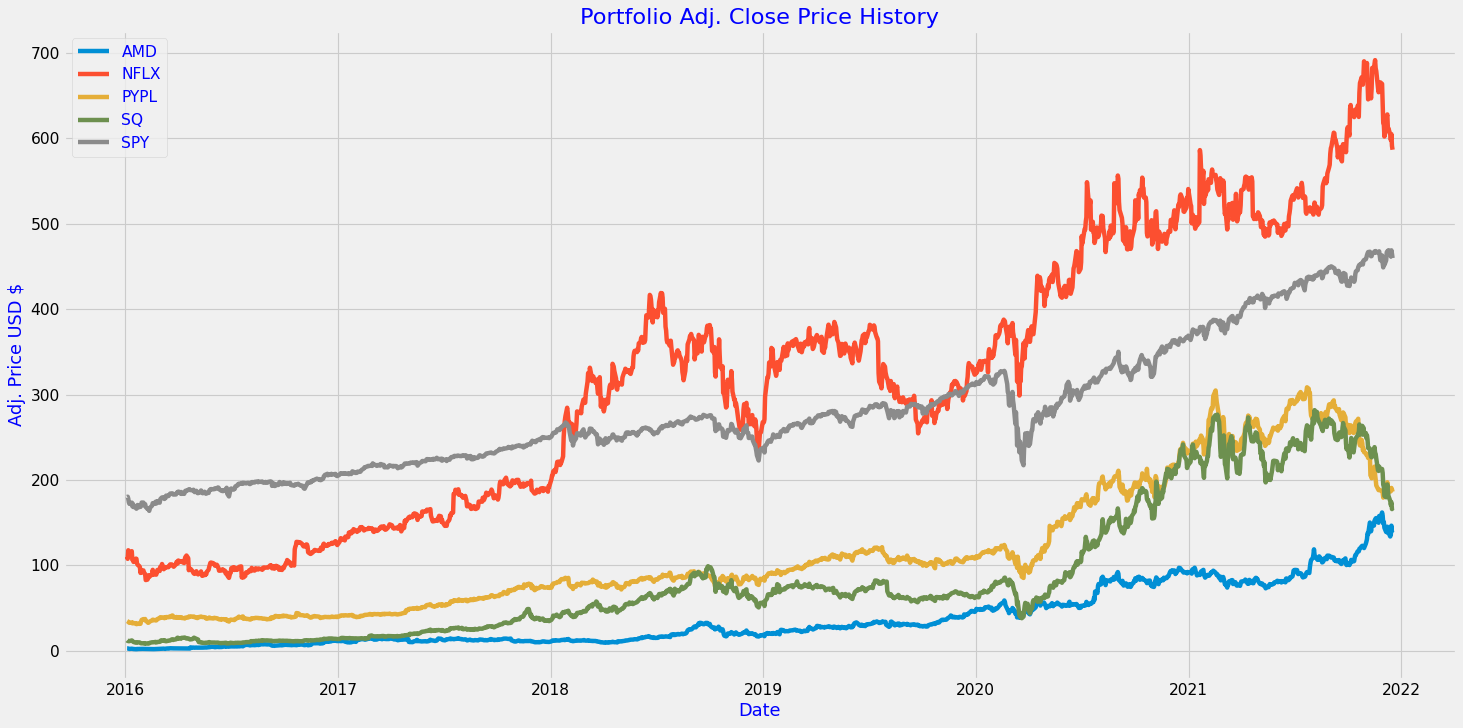

In [ ]:
# visually show the stock/portfolio
title = 'Portfolio Adj. Close Price History'

# get the stocks
my_stocks = df

# create and plot the graph
plt.figure(figsize=(20, 10), dpi=80)

for c in my_stocks.columns.values:
  plt.plot(my_stocks[c],label=c)



plt.title(title)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Adj. Price USD $', fontsize=16)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [ ]:
# show the daily simple return
returns = df.pct_change()
returns

,AMD,NFLX,PYPL,SQ,SPY
Date,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.007220,-0.020917,-0.012662,-0.053454,0.001691
2016-01-06,-0.087273,0.093071,-0.009618,0.000869,-0.012614
2016-01-07,-0.091633,-0.026513,-0.025015,-0.031250,-0.023992
2016-01-08,-0.061403,-0.027671,-0.013281,0.013441,-0.010977
...,...,...,...,...,...
2021-12-13,-0.034284,-0.011608,-0.011299,-0.032429,-0.008858
2021-12-14,0.013453,-0.010867,0.002253,-0.026904,-0.006880
2021-12-15,0.080383,0.011789,0.020664,0.018041,0.015625


In [ ]:
# create and show the annualised covariance matrix (simplified)
cov_matrix_annual = returns.cov()*252
cov_matrix_annual

,AMD,NFLX,PYPL,SQ,SPY
AMD,0.384359,0.080866,0.074774,0.124770,0.049850
NFLX,0.080866,0.154969,0.058161,0.086108,0.032830
PYPL,0.074774,0.058161,0.119676,0.108456,0.041143
SQ,0.124770,0.086108,0.108456,0.287058,0.053188
SPY,0.049850,0.032830,0.041143,0.053188,0.032515


In [ ]:
# calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual,weights))
port_variance

0.09595480896456358

In [ ]:
# calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.3097657323923413

In [ ]:
# average daily returns annualised
return_cols = list(returns.columns)
returns_with_one = returns.copy()
returns_with_one +=1
returns_with_one


portfolio_simple_annual_return = np.sum(returns_with_one.mean()*weights)**252 - 1
portfolio_simple_annual_return

0.5841484664763026

In [ ]:
# so the expected annual return, volatility (risk), and variance
percent_var = str(round(port_variance,3)*100)+'%'
percent_vola = str(round(port_volatility,3)*100)+'%'
percent_ret = str(round(portfolio_simple_annual_return,3)*100)+'%'

print('Expected annual return: '+percent_ret)
print('Annual volatility/ risk: '+percent_vola)
print('Annual variance: '+percent_var)


Expected annual return: 58.4%
Annual volatility/ risk: 31.0%
Annual variance: 9.6%


In [ ]:
!pip install PyPortfolioOpt

     |████████████████████████████████| 61 kB 3.3 MB/s 
     |████████████████████████████████| 2.8 MB 10.6 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

# Maximise Sharpe Ratio - aka the tangency porfolio

In [ ]:
# portfolio optimisation

# calculate the expected returns and the annualised sample covariance matrix of asset returns

# you just need the original asset prices dataframe as input
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# mean-variance optimisation
# weights bounded to between 0 and 1
ef = EfficientFrontier(mu, S, weight_bounds=(0,1))
# set weights to max sharpe ratio
# risk_free_weight defaulted to 0.02 or 2%
weights = ef.max_sharpe()
# round weights and clip near-zeros
cleaned_weights = ef.clean_weights()
print(weights, '\n')
print(cleaned_weights, '\n')
ef.portfolio_performance(verbose=True)

OrderedDict([('AMD', 0.5525218465218662), ('NFLX', 0.1019669525017274), ('PYPL', 0.1475643111148313), ('SQ', 0.197946889861575), ('SPY', 0.0)]) 

OrderedDict([('AMD', 0.55252), ('NFLX', 0.10197), ('PYPL', 0.14756), ('SQ', 0.19795), ('SPY', 0.0)]) 

Expected annual return: 70.3%
Annual volatility: 43.9%
Sharpe Ratio: 1.55


(0.702602391590464, 0.4392739570657301, 1.5539332132278532)

## Discrete Allocation

In [ ]:
# get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 50000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation,'\n')
print(f'Funds Remaining: ${leftover}')

Discrete allocation: {'AMD': 200, 'NFLX': 9, 'PYPL': 39, 'SQ': 59} 

Funds Remaining: $51.09043884277344



# Efficient Risk - Maximise return for a given risk



In [ ]:
# reinitialise
ef = EfficientFrontier(mu, S, weight_bounds=(0,1))
# set weights to efficient risk
# set the target volatility to 0.2
weights = ef.efficient_risk(target_volatility=0.2)
cleaned_weights = ef.clean_weights()
print(cleaned_weights, '\n')
ef.portfolio_performance(verbose=True)

latest_prices = get_latest_prices(df)
# round weights and clip near-zeros
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 50000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation,'\n')
print(f'Funds Remaining: ${leftover}')

OrderedDict([('AMD', 0.10055), ('NFLX', 0.05739), ('PYPL', 0.0), ('SQ', 0.0), ('SPY', 0.84205)]) 

Expected annual return: 25.5%
Annual volatility: 20.0%
Sharpe Ratio: 1.18
Discrete allocation: {'AMD': 37, 'NFLX': 5, 'SPY': 91} 

Funds Remaining: $121.4305419921875


# Efficient Return -  Minimise risk for a targeted return

In [ ]:
# reinitialise
ef = EfficientFrontier(mu, S, weight_bounds=(0,1))
# set weights for a targeted return
# set the targeted return to to 0.25
weights = ef.efficient_return(target_return=0.25)
cleaned_weights = ef.clean_weights()
print(cleaned_weights, '\n')
ef.portfolio_performance(verbose=True)

latest_prices = get_latest_prices(df)
# round weights and clip near-zeros
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 50000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation,'\n')
print(f'Funds Remaining: ${leftover}')

OrderedDict([('AMD', 0.09389), ('NFLX', 0.05544), ('PYPL', 0.0), ('SQ', 0.0), ('SPY', 0.85067)]) 

Expected annual return: 25.0%
Annual volatility: 19.8%
Sharpe Ratio: 1.16
Discrete allocation: {'AMD': 34, 'NFLX': 5, 'SPY': 92} 

Funds Remaining: $74.810546875


# Min Volatility - Minimise volatility

In [ ]:
# reinitialise
ef = EfficientFrontier(mu, S, weight_bounds=(0,1))
# minimise volatility
weights = ef.min_volatility()
cleaned_weights = ef.clean_weights()
print(cleaned_weights, '\n')
ef.portfolio_performance(verbose=True)

latest_prices = get_latest_prices(df)
# round weights and clip near-zeros
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 50000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation,'\n')
print(f'Funds Remaining: ${leftover}')

OrderedDict([('AMD', 0.0), ('NFLX', 0.0), ('PYPL', 0.0), ('SQ', 0.0), ('SPY', 1.0)]) 

Expected annual return: 17.0%
Annual volatility: 18.0%
Sharpe Ratio: 0.83
Discrete allocation: {'SPY': 108} 

Funds Remaining: $334.04052734375


# Add Extra Constraints

In [ ]:
# reinitialise
ef = EfficientFrontier(mu, S, weight_bounds=(0,1))

# add 5% minimum holding constraint to SQ
ef.add_constraint(lambda x:x[3]>=0.05)

# add sector mapper
sector_mapper = {
    'AMD': 'Semi-Conductors'
    ,'NFLX': 'Entertainment'
    ,'PYPL': 'Payments'
    ,'SQ': 'Payments'
    ,'SPY': 'Market'
}

# sector minimum
sector_lower = {'Market': 0.2} # at least 20% to SPY

# maximum allocations to each sector
sector_upper = {
    'Semi-Conductors': 0.3
    ,'Entertainment': 0.3
    ,'Payments': 0.3
}
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)


# set weights to efficient risk
# set the target volatility to 0.2
weights = ef.efficient_risk(target_volatility=0.2)
cleaned_weights = ef.clean_weights()
print(cleaned_weights, '\n')
ef.portfolio_performance(verbose=True)

latest_prices = get_latest_prices(df)
# round weights and clip near-zeros
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 50000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation,'\n')
print(f'Funds Remaining: ${leftover}')

OrderedDict([('AMD', 0.07018), ('NFLX', 0.03919), ('PYPL', 0.0), ('SQ', 0.05), ('SPY', 0.84063)]) 

Expected annual return: 24.9%
Annual volatility: 20.0%
Sharpe Ratio: 1.14
Discrete allocation: {'AMD': 26, 'NFLX': 3, 'SQ': 14, 'SPY': 92} 

Funds Remaining: $11.4305419921875


In [ ]:
References:
https://pyportfolioopt.readthedocs.io/en/latest/MeanVariance.html
https://www.forecaster.site/portfolio-optimization-with-python/
